<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/Detekcja_kraw%C4%99dzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

cv2.__version__

'4.6.0'

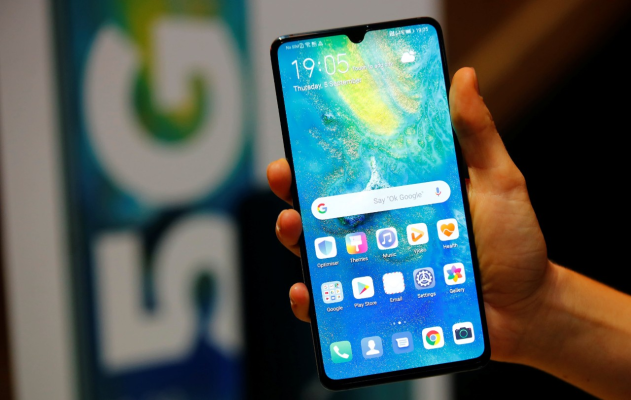

In [3]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

Konwersja na szary

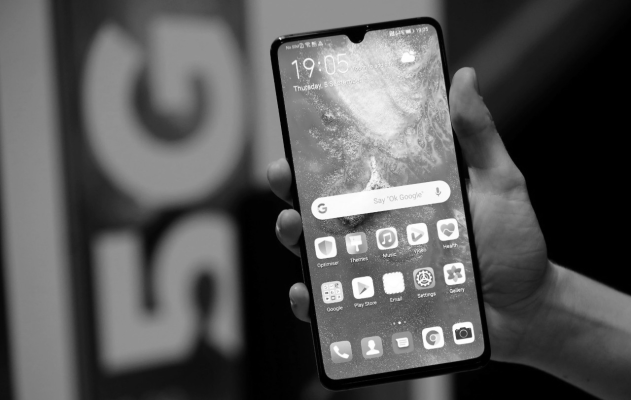

In [4]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

Detekcja krawędzi

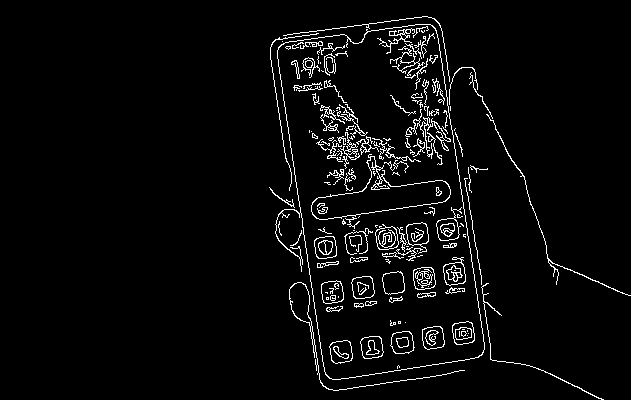

In [5]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

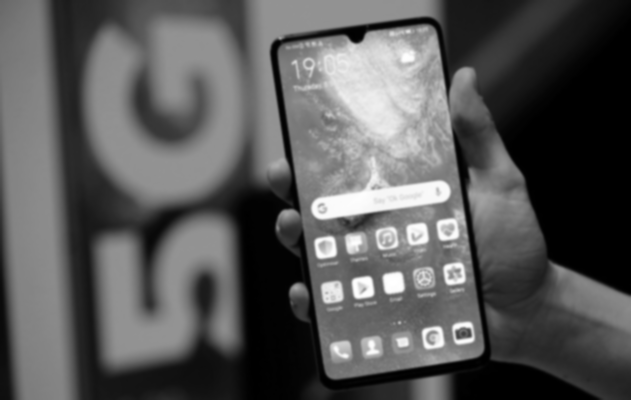

In [6]:
#rozmywamy zdjęcie GaussianBlur
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5, 5), sigmaX=0)
cv2_imshow(gray_image)

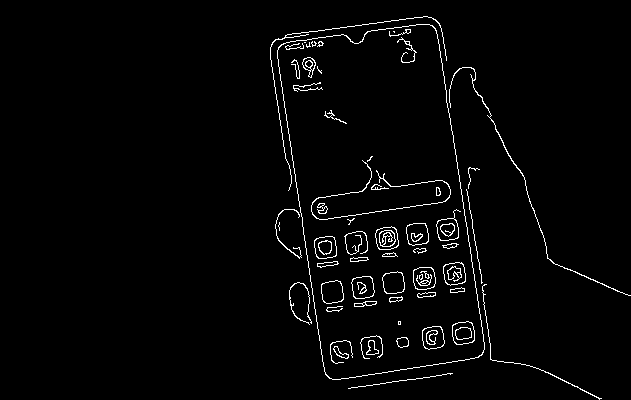

In [7]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

Detekcja konturu

In [10]:
#findCountour znajduje wszystkie kontury
contours = cv2.findContours(image=edges.copy(),
                            mode=cv2.RETR_TREE, 
                            method=cv2.CHAIN_APPROX_SIMPLE)
#grab_contourus -> lepiej przetwarza kontury
contours = imutils.grab_contours(contours)
#sortujemy kontury względem klucza -> kluczem będzie pole konturu i wycinamy 10 pierwszych elementów
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

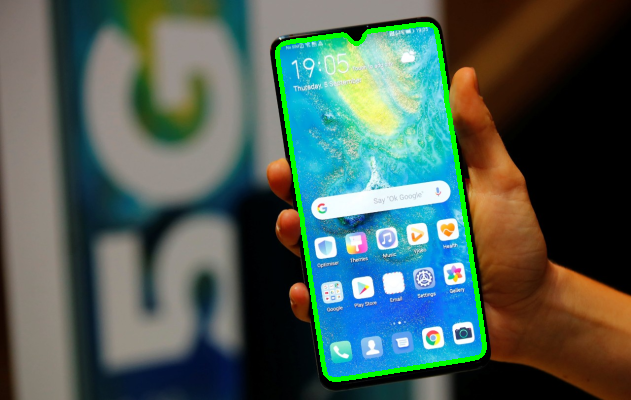

In [11]:
#wyswietlamy kontur z indeksem 0
cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt1)

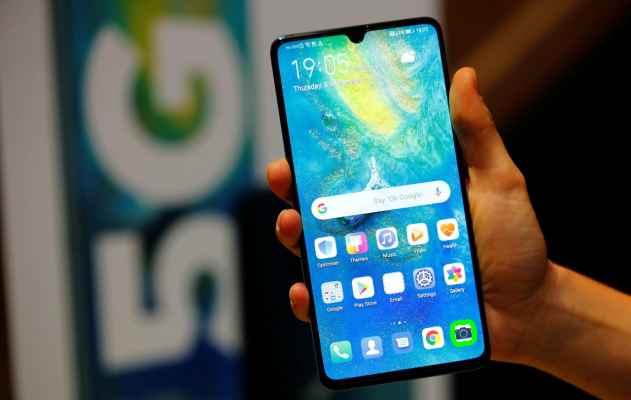

In [12]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[3]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

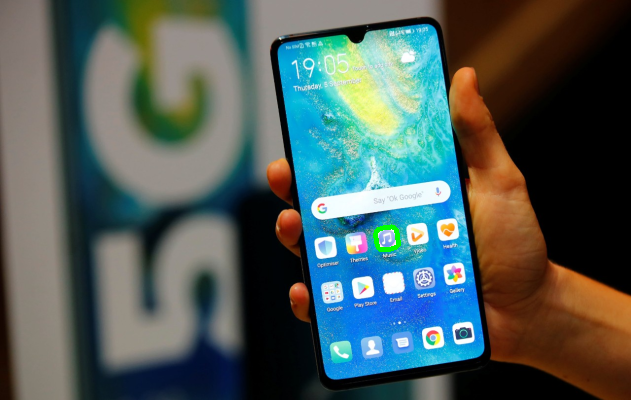

In [13]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[2]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

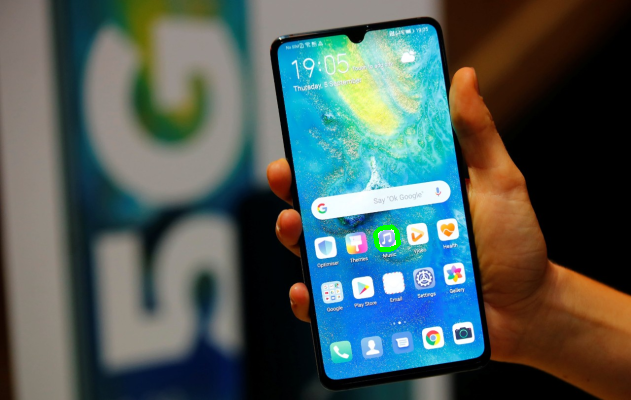

In [19]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[5]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

Detekcja prostokąta -> to jest w chuj ważne i cięzkie :)) coś za coś meh
POWTÓRZYĆ !!!!!!!!!!!!!!!!

In [27]:
#iterujemy po kazdym wykrytym konturze
#obliczymy długość konturu -> uzyjemy tego do aproksymacji, ona przybliży kontur do wielokąta funkcja zwróci konkretne wierzchołki

screen_contour = None

for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

In [28]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

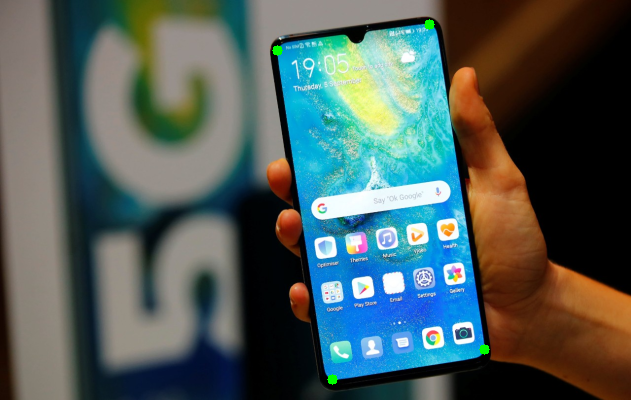

In [29]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

Wyświetlenie obrazu

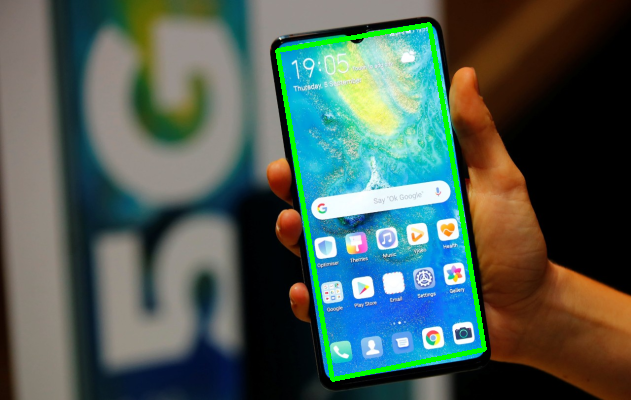

In [30]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)